#### <strong>TA work1 資料分析</strong>


In [472]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [473]:
share_linlk = "https://docs.google.com/spreadsheets/d/1e1wEiWF6-D57hzPqE5vmqMo4dtLDWoDYdElD53uw7g8/edit"

# 憑證
gc = gspread.service_account(filename='token.json')

#開啟google sheet並指定要的檔案
worksheet = gc.open_by_url(share_linlk).worksheet('Group1')
worksheet2 = gc.open_by_url(share_linlk).worksheet('Group2')

#讀取資料
data1 = worksheet.get_all_records()

data2 = worksheet2.get_all_records()

# for row in data1:
#     print(row)

# for row in data2:
#     print(row)

#轉成dataframe

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [474]:
print(df1.columns)
print(df2.columns)
df1.head(10)

Index(['應試號碼', '委員編號', '外語、數理及邏輯推理能力(40%)', '自我成長與多元表現能力(30%)',
       '人格特質與學習能力(30%)', '總分(100%)', '備註(50字元)'],
      dtype='object')
Index(['應試號碼', '委員編號', '外語、數理及邏輯推理能力(20%)', '自我成長與多元表現能力(20%)',
       '人格特質與面對逆境能力及 學習能力(30%)', '經濟不利證明(30%)', '總分(100%)', '備註(50字元)'],
      dtype='object')


,應試號碼,委員編號,外語、數理及邏輯推理能力(40%),自我成長與多元表現能力(30%),人格特質與學習能力(30%),總分(100%),備註(50字元)
0,11006535,A10,90,90,85,88.5,
1,11006535,A2,80,80,80,80.0,
2,11006535,A3,91,88,80,86.8,
3,11006535,A1,92,90,93,91.7,
4,11006535,A4,85,75,80,80.5,
5,11006535,A5,88,85,87,86.8,
6,11006535,A6,90,80,85,85.5,
7,11006535,A7,90,86,84,87.0,
8,11006535,A8,90,79,85,85.2,
9,11006535,A9,60,50,70,60.0,test


<hr>

<font color=pink>不太重要</font>

In [475]:
df1.isna().sum()

應試號碼                 0
委員編號                 0
外語、數理及邏輯推理能力(40%)    0
自我成長與多元表現能力(30%)     0
人格特質與學習能力(30%)       0
總分(100%)             0
備註(50字元)             0
dtype: int64

In [476]:
df1['備註(50字元)'].isna().value_counts()

備註(50字元)
False    100
Name: count, dtype: int64

In [477]:
df1['委員編號'] = df1['委員編號'].str.replace('A', '').astype(int)
df1_sorted = df1.sort_values(by =[ "應試號碼","委員編號"])
df1_sorted.head(10)

,應試號碼,委員編號,外語、數理及邏輯推理能力(40%),自我成長與多元表現能力(30%),人格特質與學習能力(30%),總分(100%),備註(50字元)
3,11006535,1,92,90,93,91.7,
1,11006535,2,80,80,80,80.0,
2,11006535,3,91,88,80,86.8,
4,11006535,4,85,75,80,80.5,
5,11006535,5,88,85,87,86.8,
6,11006535,6,90,80,85,85.5,
7,11006535,7,90,86,84,87.0,
8,11006535,8,90,79,85,85.2,
9,11006535,9,60,50,70,60.0,test
0,11006535,10,90,90,85,88.5,


In [478]:
total_scores_by_id = df1_sorted.groupby('應試號碼')['總分(100%)'].mean().reset_index()


total_scores_by_id['排名'] = total_scores_by_id['總分(100%)'].rank(ascending=False).astype(int)


total_scores_by_id

,應試號碼,總分(100%),排名
0,11006535,83.20,3
1,11011215,72.70,10
2,11055029,82.94,5
3,11065727,79.19,6
4,11090216,85.74,1
5,11096621,76.70,8
6,11147002,83.08,4
7,11147436,78.66,7
8,11207504,73.28,9
9,11245213,84.25,2


In [479]:
dfs1_filtered = {}
for i in range(1, 11):
    df1_filtered = df1_sorted[df1_sorted['委員編號'] != i]
    df1_filtered = df1_filtered.drop(columns=['外語、數理及邏輯推理能力(40%)','自我成長與多元表現能力(30%)'\
                                              ,'人格特質與學習能力(30%)','備註(50字元)' ] , inplace=False)
    dfs1_filtered[f'A{i}'] = df1_filtered

dfs1_filtered["A1"].head(10)

,應試號碼,委員編號,總分(100%)
1,11006535,2,80.0
2,11006535,3,86.8
4,11006535,4,80.5
5,11006535,5,86.8
6,11006535,6,85.5
7,11006535,7,87.0
8,11006535,8,85.2
9,11006535,9,60.0
0,11006535,10,88.5
11,11011215,2,77.5


In [480]:
results = {}


for key, df_filtered in dfs1_filtered.items():
    
    total_scores_by_id_remove = df_filtered.groupby('應試號碼')['總分(100%)'].mean().reset_index()
    
    total_scores_by_id_remove['排名'] = total_scores_by_id_remove['總分(100%)'].rank(ascending=False).astype(int)
    
    results[key] = total_scores_by_id_remove

results['A2'].head(10)

,應試號碼,總分(100%),排名
0,11006535,83.555556,3
1,11011215,72.166667,10
2,11055029,83.100000,4
3,11065727,78.766667,6
4,11090216,85.322222,1
5,11096621,76.388889,8
6,11147002,82.366667,5
7,11147436,78.233333,7
8,11207504,72.811111,9
9,11245213,83.833333,2


<hr>

<font color=yellow>group1 boxplot</font>

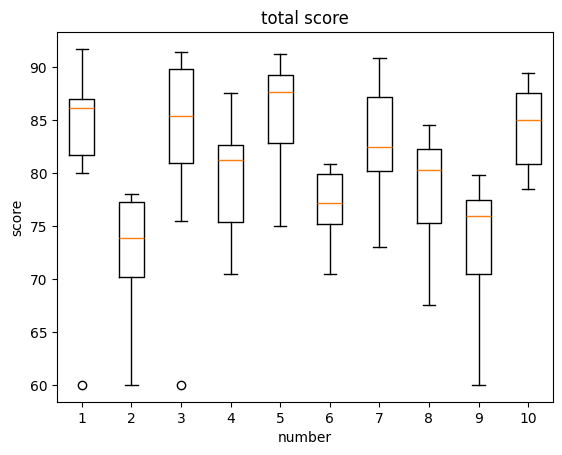

In [481]:
total_scores = [df1_sorted[df1_sorted['應試號碼'] == number]['總分(100%)'] for number in df1_sorted['應試號碼'].unique()]


plt.boxplot(total_scores)
plt.title('total score')
plt.xlabel('number')
plt.ylabel('score')
plt.show()


<hr>

<font color=yellow>相關係數比較（根據排名）</font>

In [482]:
correlation = results['A1']['排名'].corr(total_scores_by_id['排名'])

print("A1 & total_scores_by_id correlation coeffient:", correlation)

#print(results)

A1 & total_scores_by_id correlation coeffient: 0.9878787878787878


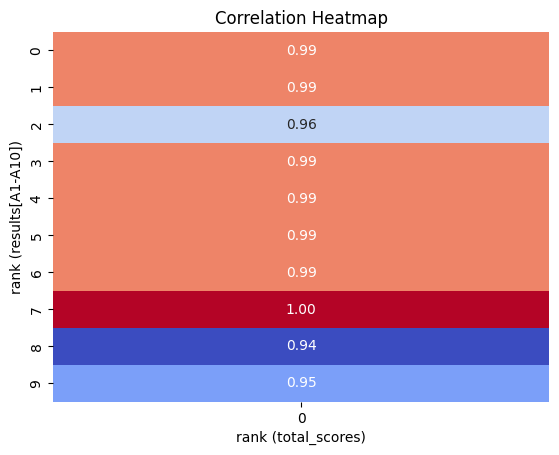

In [483]:
correlations_1_2_compare = []
for i in range(1, 11):
    correlation = results[f'A{i}']['排名'].corr(total_scores_by_id['排名'])
    correlations_1_2_compare.append(correlation)

# Reshape correlations for heatmap
correlation_matrix = [[correlations_1_2_compare[i]] for i in range(0,10)]

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=False)
plt.title('Correlation Heatmap')
plt.ylabel('rank (results[A1-A10])')
plt.xlabel('rank (total_scores)')
plt.show()



**<font color=pink>事項：</font>**
* A1~A10 : 0~9
* 相關係數 放在 correlations_1_2_compare
<hr>

In [484]:
df1_sorted.head(10)

,應試號碼,委員編號,外語、數理及邏輯推理能力(40%),自我成長與多元表現能力(30%),人格特質與學習能力(30%),總分(100%),備註(50字元)
3,11006535,1,92,90,93,91.7,
1,11006535,2,80,80,80,80.0,
2,11006535,3,91,88,80,86.8,
4,11006535,4,85,75,80,80.5,
5,11006535,5,88,85,87,86.8,
6,11006535,6,90,80,85,85.5,
7,11006535,7,90,86,84,87.0,
8,11006535,8,90,79,85,85.2,
9,11006535,9,60,50,70,60.0,test
0,11006535,10,90,90,85,88.5,


In [485]:
df_new = df1_sorted[df1_sorted['委員編號'] == 1].copy()

# 如果你想要重设索引，可以使用下面的方法
df_new.reset_index(drop=True, inplace=True)
df_new = df_new.drop(columns=['外語、數理及邏輯推理能力(40%)','自我成長與多元表現能力(30%)'\
                                              ,'人格特質與學習能力(30%)','備註(50字元)' ] , inplace=False)

# 显示新的 DataFrame
df_new

,應試號碼,委員編號,總分(100%)
0,11006535,1,91.7
1,11011215,1,71.2
2,11055029,1,90.3
3,11065727,1,81.8
4,11090216,1,86.7
5,11096621,1,80.8
6,11147002,1,80.6
7,11147436,1,80.6
8,11207504,1,75.9
9,11245213,1,89.4


In [486]:
df_a1 = df1_sorted[df1_sorted['委員編號'] == 1].copy()
df_a1.reset_index(drop=True, inplace=True)
df_a1.head(10)

,應試號碼,委員編號,外語、數理及邏輯推理能力(40%),自我成長與多元表現能力(30%),人格特質與學習能力(30%),總分(100%),備註(50字元)
0,11006535,1,92,90,93,91.7,
1,11011215,1,70,73,71,71.2,
2,11055029,1,90,89,92,90.3,
3,11065727,1,80,84,82,81.8,
4,11090216,1,87,88,85,86.7,
5,11096621,1,82,80,80,80.8,
6,11147002,1,80,80,82,80.6,
7,11147436,1,80,81,81,80.6,
8,11207504,1,75,76,77,75.9,
9,11245213,1,90,88,90,89.4,


In [487]:
result_3_only_member = {}

# Iterate from 1 to 10
for i in range(1, 11):
    # Select data for the member with the given index i
    df_temp = df1_sorted[df1_sorted['委員編號'] == i].copy()

    # Drop unnecessary columns
    df_temp = df_temp.drop(columns=['外語、數理及邏輯推理能力(40%)','自我成長與多元表現能力(30%)'\
                                              ,'人格特質與學習能力(30%)','備註(50字元)' ] , inplace=False)


    # Calculate ranks and store them in a new column
    df_temp['排名'] = df_temp['總分(100%)'].rank(ascending=False).astype(int)

    # Reset the index
    df_temp.reset_index(drop=True, inplace=True)

    # Store the result in the dictionary
    result_3_only_member[f'A{i}'] = df_temp

# Display the data for 'A10'
result_3_only_member['A2']



,應試號碼,委員編號,總分(100%),排名
0,11006535,2,80.0,7
1,11011215,2,77.5,9
2,11055029,2,81.5,6
3,11065727,2,83.0,4
4,11090216,2,89.5,1
5,11096621,2,79.5,8
6,11147002,2,89.5,1
7,11147436,2,82.5,5
8,11207504,2,77.5,9
9,11245213,2,88.0,3


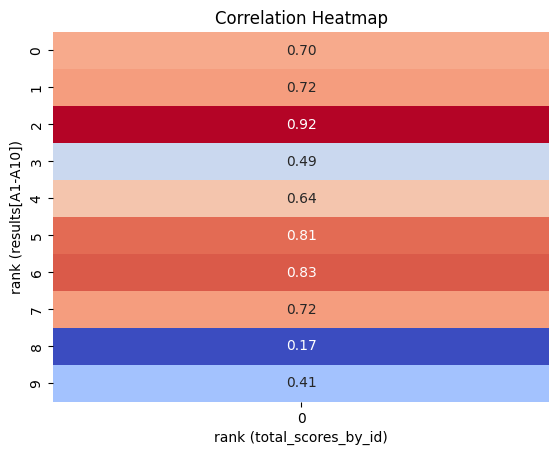

In [488]:
correlations_2_3_compare = []

for i in range(1 , 11):
    correlation = results[f'A{i}']['排名'].corr(result_3_only_member[f'A{i}']['排名'])
    correlations_2_3_compare.append(correlation)

correlation_matrix = [[correlations_2_3_compare[i]] for i in range(0,10)]


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=False)  
plt.title('Correlation Heatmap')
plt.ylabel('rank (results[A1-A10])')
plt.xlabel('rank (total_scores_by_id)')
plt.show()

**<font color=pink>事項：</font>**
* A1~A10 : 0~9
* 相關係數 放在 correlations_1_2_compare
<hr>

In [489]:
print(correlations_1_2_compare)
print(correlations_2_3_compare)

[0.9878787878787878, 0.9878787878787878, 0.9636363636363635, 0.9878787878787878, 0.9878787878787878, 0.9878787878787878, 0.9878787878787878, 0.9999999999999999, 0.9393939393939393, 0.9515151515151514]
[0.6963106238227912, 0.7229668978235544, 0.9164589998052638, 0.49090909090909085, 0.6351520030080796, 0.8082176883657399, 0.8303030303030302, 0.7212121212121211, 0.16903998108592902, 0.40519316074537937]


<hr>
<font color=yellow>接下來把資料輸入進去</font>

In [490]:
gc = gspread.service_account(filename='token.json')

#開啟google sheet並指定要的檔案
worksheet = gc.open_by_url(share_linlk).worksheet('Group1 result')


worksheet.update('B3', [[correlation] for correlation in correlations_1_2_compare])
worksheet.update('E3', [[correlation] for correlation in correlations_2_3_compare])

/var/folders/xc/35491wdx3kd3hn2qh93s2z040000gn/T/ipykernel_20595/1683621330.py:7: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  worksheet.update('B3', [[correlation] for correlation in correlations_1_2_compare])
/var/folders/xc/35491wdx3kd3hn2qh93s2z040000gn/T/ipykernel_20595/1683621330.py:8: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  worksheet.update('E3', [[correlation] for correlation in correlations_2_3_compare])


{'spreadsheetId': '1e1wEiWF6-D57hzPqE5vmqMo4dtLDWoDYdElD53uw7g8',
 'updatedRange': "'Group1 result'!E3:E12",
 'updatedRows': 10,
 'updatedColumns': 1,
 'updatedCells': 10}

<hr>
<hr>


<font color=pink>第二組資料</font>

* 前面已經有提出來過了（df2）

In [491]:
df2.head(1)

,應試號碼,委員編號,外語、數理及邏輯推理能力(20%),自我成長與多元表現能力(20%),人格特質與面對逆境能力及 學習能力(30%),經濟不利證明(30%),總分(100%),備註(50字元)
0,11018523,A1,75,85,90,95,87.5,


In [492]:
df2_sorted = df2.drop(columns=['外語、數理及邏輯推理能力(20%)','自我成長與多元表現能力(20%)'\
                                 ,'人格特質與面對逆境能力及 學習能力(30%)','備註(50字元)' , '經濟不利證明(30%)' ] , inplace=False)

In [493]:
df2_sorted.head(1)

,應試號碼,委員編號,總分(100%)
0,11018523,A1,87.5


In [494]:
df2_sorted['委員編號'] = df2_sorted['委員編號'].str.replace('A', '').astype(int)
df2_sorted = df2_sorted.sort_values(by =[ "應試號碼","委員編號"])

* 先從1個的嘗試做做看

In [495]:
df2_a1 = df2_sorted[df2_sorted['委員編號'] == 1].copy()
df2_a1.reset_index(drop=True, inplace=True)
df2_a1.head(2)

,應試號碼,委員編號,總分(100%)
0,11018523,1,87.5
1,11274711,1,87.9


In [496]:
result2_only_member = {}

# Iterate from 1 to 10
for i in range(1, 11):
    # Select data for the member with the given index i
    df_temp = df2_sorted[df2_sorted['委員編號'] == i].copy()

    # Calculate ranks and store them in a new column
    df_temp['排名'] = df_temp['總分(100%)'].rank(ascending=False).astype(int)

    # Reset the index
    df_temp.reset_index(drop=True, inplace=True)

    # Store the result in the dictionary
    result2_only_member[f'A{i}'] = df_temp

# Display the data for 'A10'
result2_only_member['A2']



,應試號碼,委員編號,總分(100%),排名
0,11018523,2,85.0,1
1,11274711,2,80.3,2


In [497]:
rank_data = result2_only_member['A1']['排名'].tolist()
print(rank_data)

[2, 1]


In [498]:
data_to_insert = [[rank] for rank in rank_data]
print(data_to_insert)

[[2], [1]]


*  輸入各個委員對學生比較

In [499]:

gc = gspread.service_account(filename='token.json')

#開啟google sheet並指定要的檔案
worksheet = gc.open_by_url(share_linlk).worksheet('Group 2 result')


for i in range(1, 11):
    rank_data = result2_only_member[f'A{i}']['排名'].tolist()

    #插入google sheet的值就算只是個值，也必須是list的型態
    worksheet.update(f'B{i+2}', [[rank_data[0]]]) 
    worksheet.update(f'C{i+2}', [[rank_data[1]]])  


    



/var/folders/xc/35491wdx3kd3hn2qh93s2z040000gn/T/ipykernel_20595/1636198999.py:11: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  worksheet.update(f'B{i+2}', [[rank_data[0]]])
/var/folders/xc/35491wdx3kd3hn2qh93s2z040000gn/T/ipykernel_20595/1636198999.py:12: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  worksheet.update(f'C{i+2}', [[rank_data[1]]])


<hr>

* 輸入總分資料

In [500]:
df2_sorted.head(11)

,應試號碼,委員編號,總分(100%)
0,11018523,1,87.5
9,11018523,2,85.0
1,11018523,3,60.5
2,11018523,4,91.5
3,11018523,5,78.5
4,11018523,6,88.0
5,11018523,7,90.5
6,11018523,8,73.7
7,11018523,9,82.0
8,11018523,10,87.5


In [501]:
group1 = df2_sorted[df2_sorted['應試號碼'] == 11018523].copy()
group2 = df2_sorted[df2_sorted['應試號碼'] == 11274711].copy()
group2.head(1)

,應試號碼,委員編號,總分(100%)
10,11274711,1,87.9


In [502]:
worksheet.update('B13', [[group1['總分(100%)'].mean()]])
worksheet.update('C13', [[group2['總分(100%)'].mean()]])

/var/folders/xc/35491wdx3kd3hn2qh93s2z040000gn/T/ipykernel_20595/2400738066.py:1: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  worksheet.update('B13', [[group1['總分(100%)'].mean()]])
/var/folders/xc/35491wdx3kd3hn2qh93s2z040000gn/T/ipykernel_20595/2400738066.py:2: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  worksheet.update('C13', [[group2['總分(100%)'].mean()]])


{'spreadsheetId': '1e1wEiWF6-D57hzPqE5vmqMo4dtLDWoDYdElD53uw7g8',
 'updatedRange': "'Group 2 result'!C13",
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}